## The goal of this XP:
- Remove background in anatomical individual 
- Remove background in functional individual 

In [2]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [3]:
% Set parameters
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';

# Mask anatomical backgroud 

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


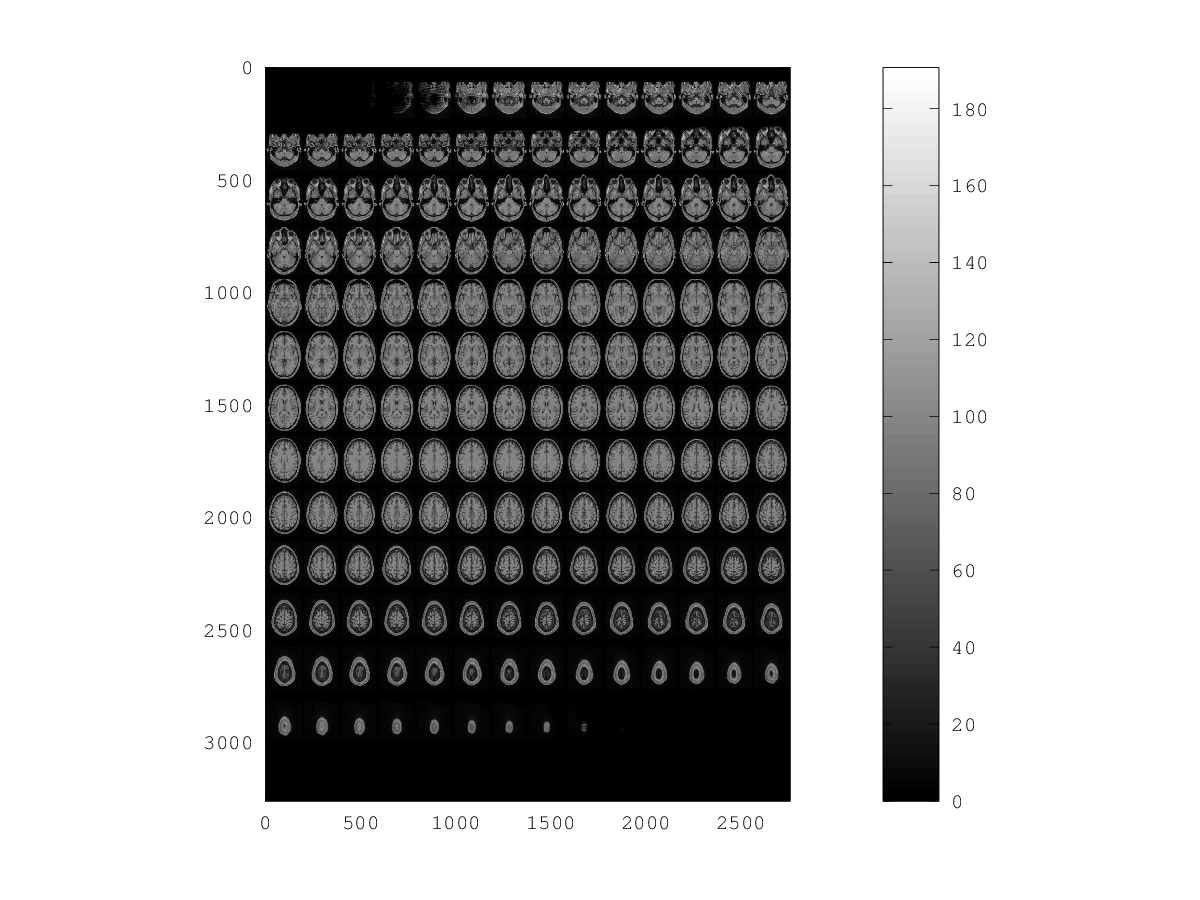

In [35]:
# mask background
niak_gb_vars
param.perc_min = 0.1;
param.perc_max = 0.98;
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_mask.mnc.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


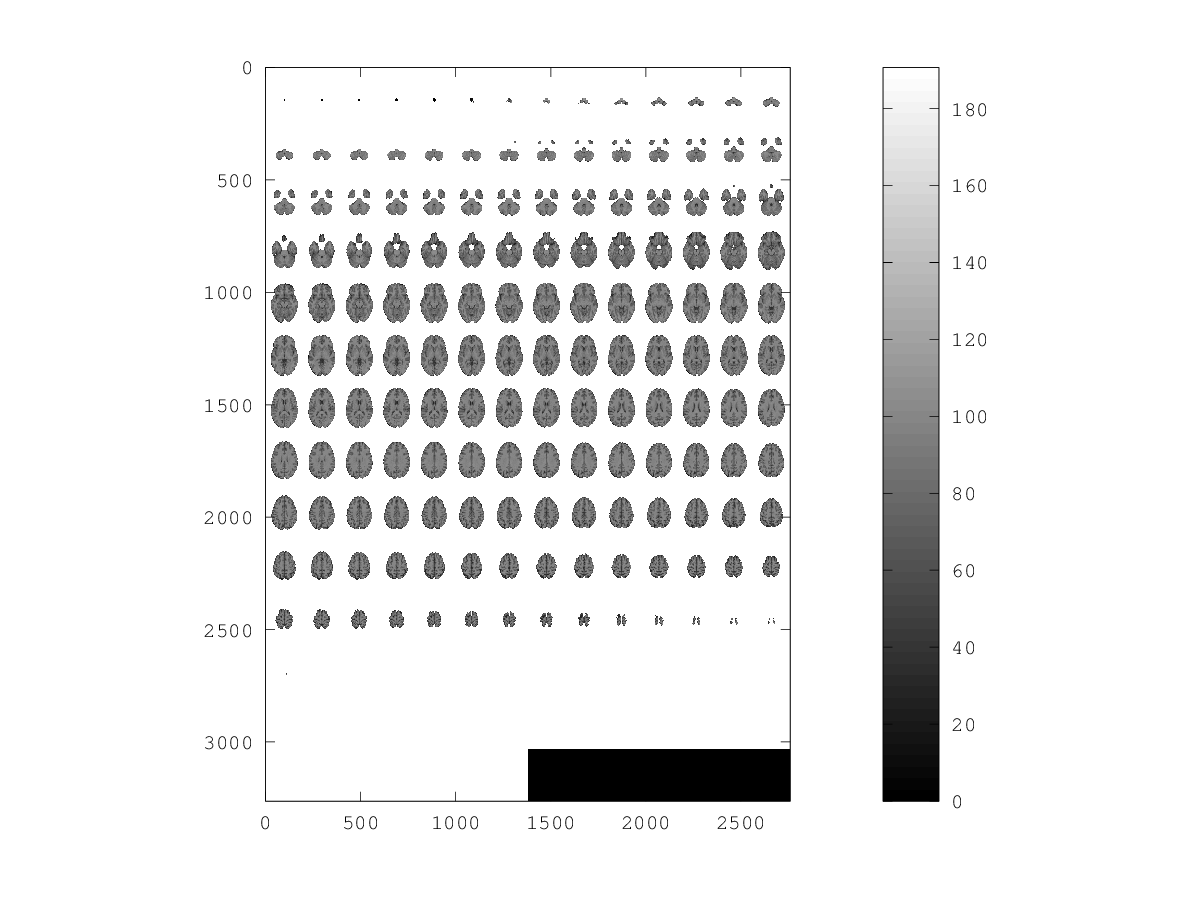

In [36]:
#mask = mask>0;
#val = sort(vol(mask),'ascend');
#vmin = val(round(param.perc_min*length(val)));
#vmax = val(round(param.perc_max*length(val)));
#vol(vol<vmin) = vmin;
#vol(vol>vmax) = vmax;
#vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = max(vol(:));

opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/HC0040013/HC0040013_nuc_stereonl_white.nii.gz'];
niak_write_vol(hdr,vol);

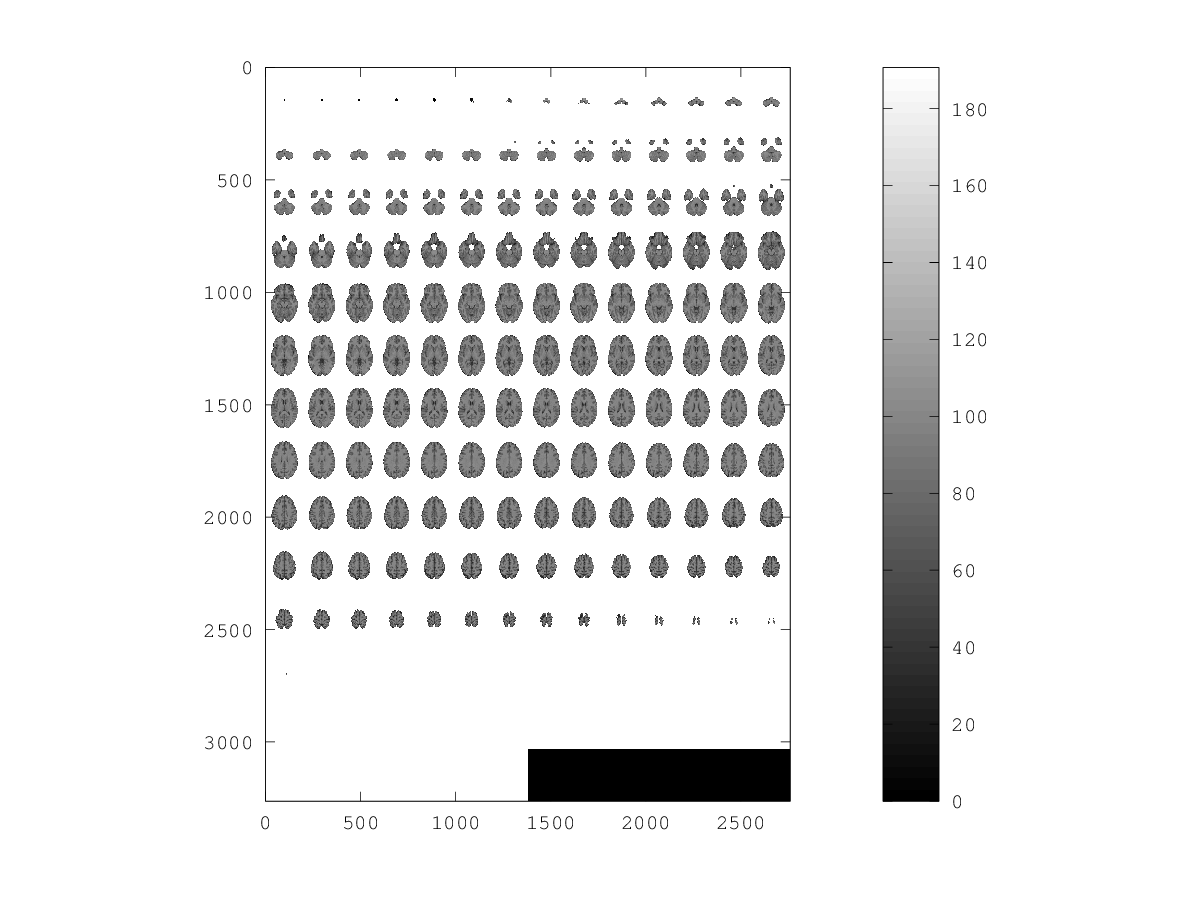

In [29]:
#mask = mask>0;
#val = sort(vol(mask),'ascend');
#vmin = val(round(param.perc_min*length(val)));
#vmax = val(round(param.perc_max*length(val)));
#vol(vol<vmin) = vmin;
#vol(vol>vmax) = vmax;
#vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = max(vol(:));

opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/HC0040013/HC0040013_nuc_stereonl_white.nii.gz'];
niak_write_vol(hdr,vol);

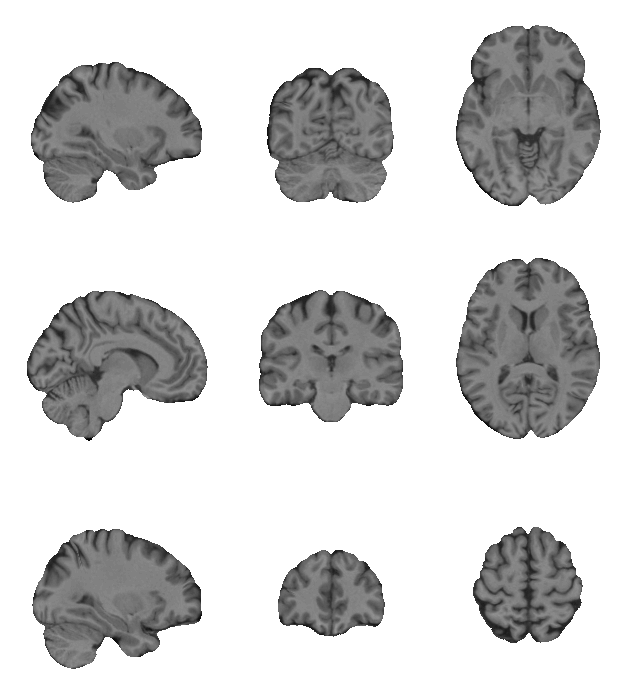

In [7]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/HC0040013/HC0040013_nuc_stereonl_white.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = max(vol(:));
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imageIO at line 106 column 11
    imread at line 106 column 30
    niak_brick_add_overlay at line 47 column 6


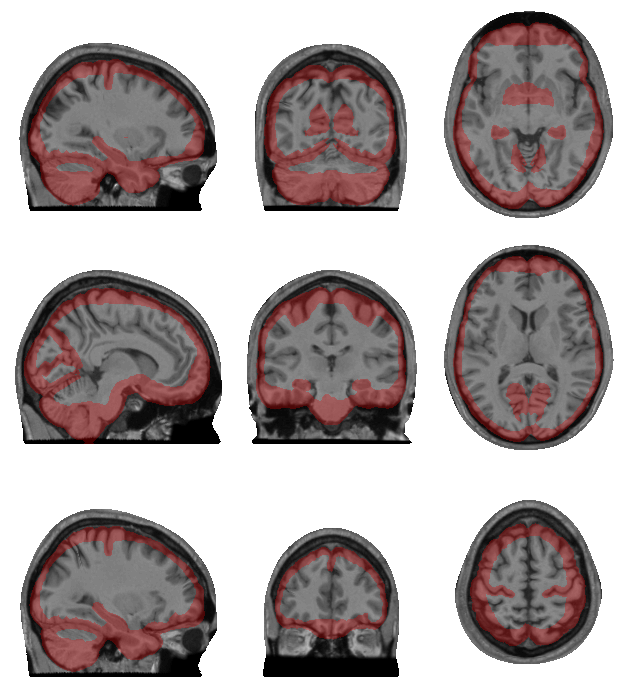

In [4]:
%% Add overlay functional-layout to anat subject 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white_func_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

# Mask Functional background

### Invert a subject BOLD contrast including head in the mask

In [30]:
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out =  [path_root 'template_layout/test_data/HC0040013/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz to /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/ -distance 200 -mask /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/mask.mnc /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/vol.mnc /tmp/niak_tmp_882947193_func_HC0040013_mean_stereonl/vol_nu.mnc

Transforming slices:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


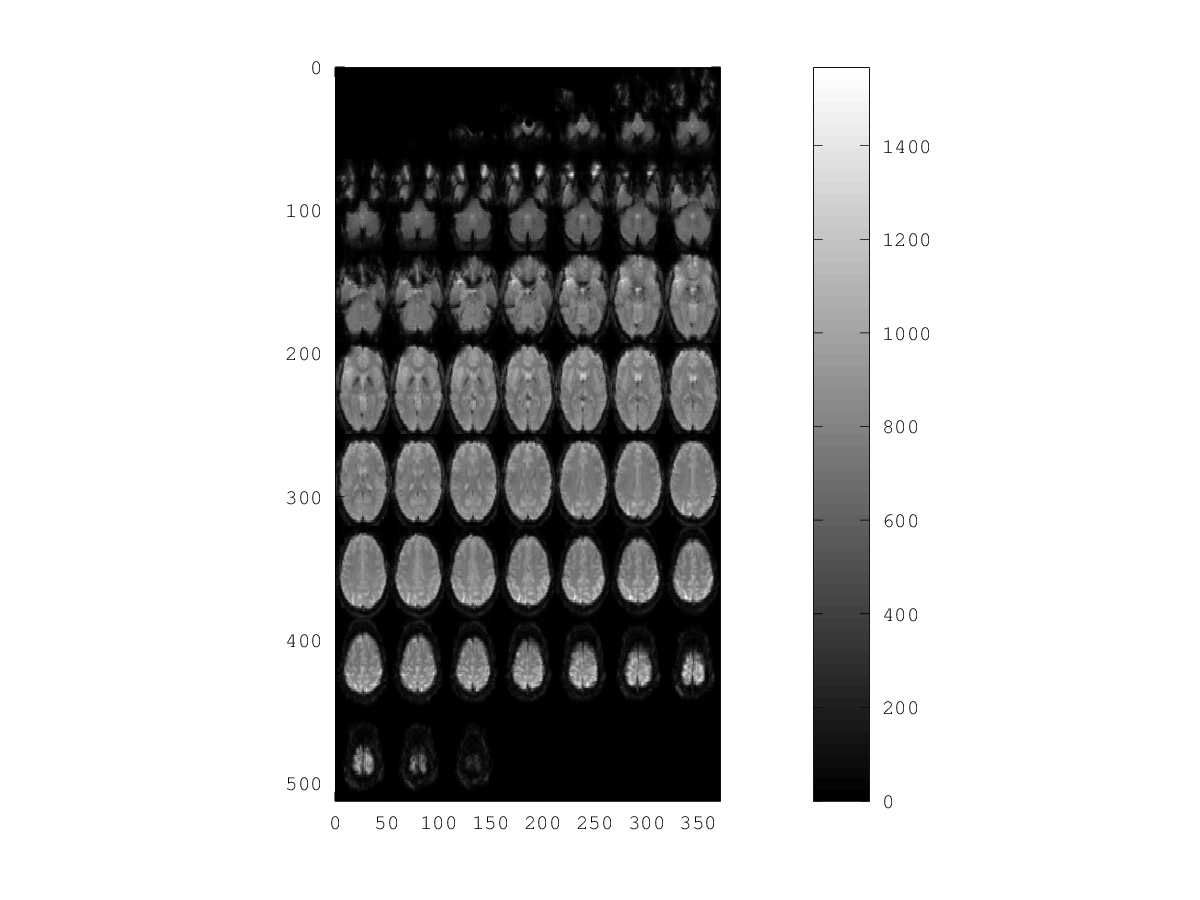

In [31]:
# Dispaly before correction image
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


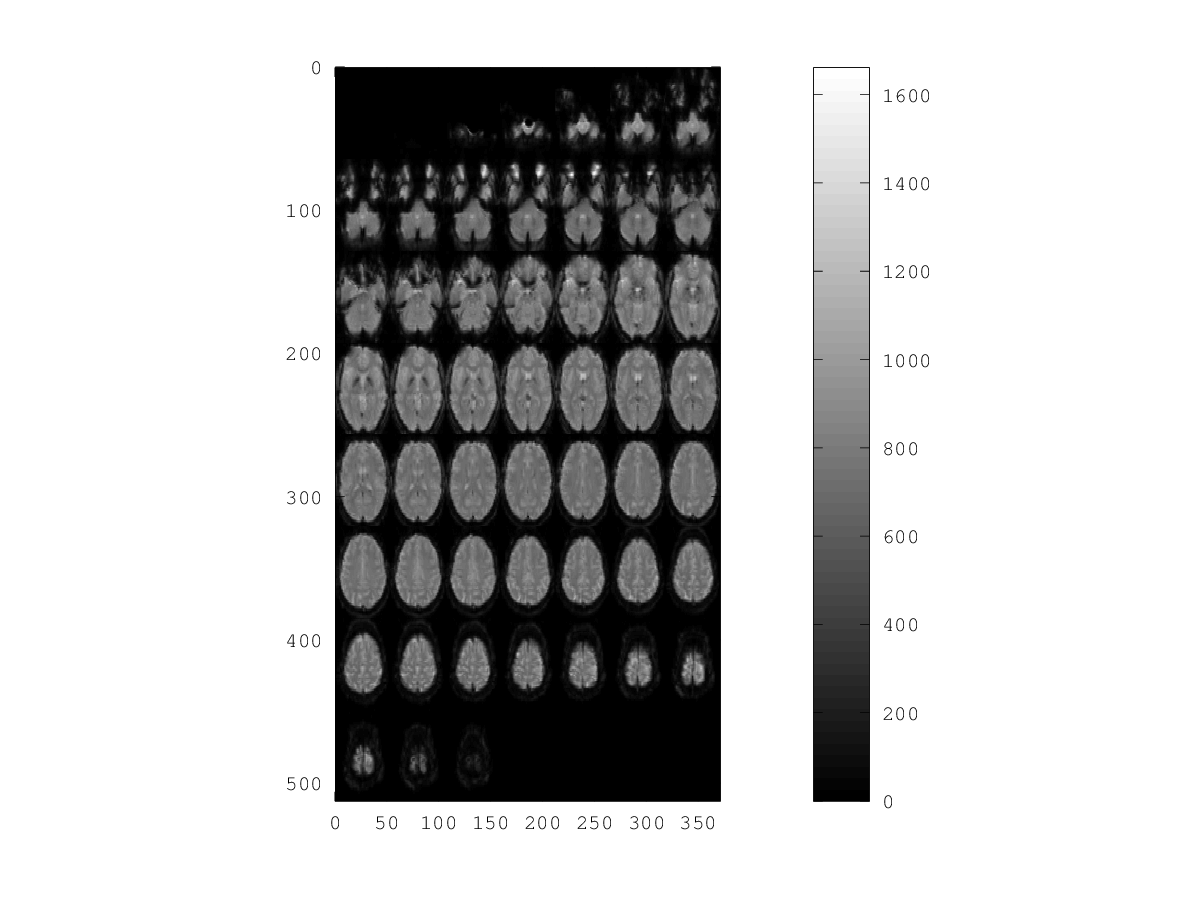

In [32]:
# After correction
niak_montage(vol,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


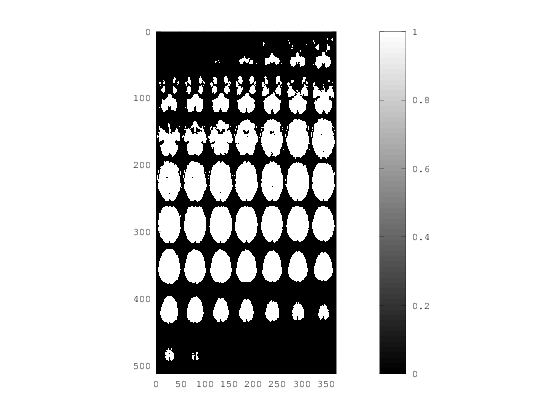

In [10]:
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,mask2] = niak_read_vol([path_root 'template_layout/test_data/group_coregistration/func_mask_group_stereonl.nii.gz']);
mask = niak_mask_brain(vol);
niak_montage(mask,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


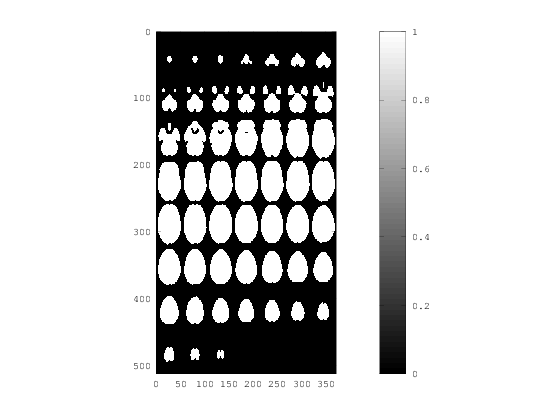

In [11]:
niak_montage(mask2,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


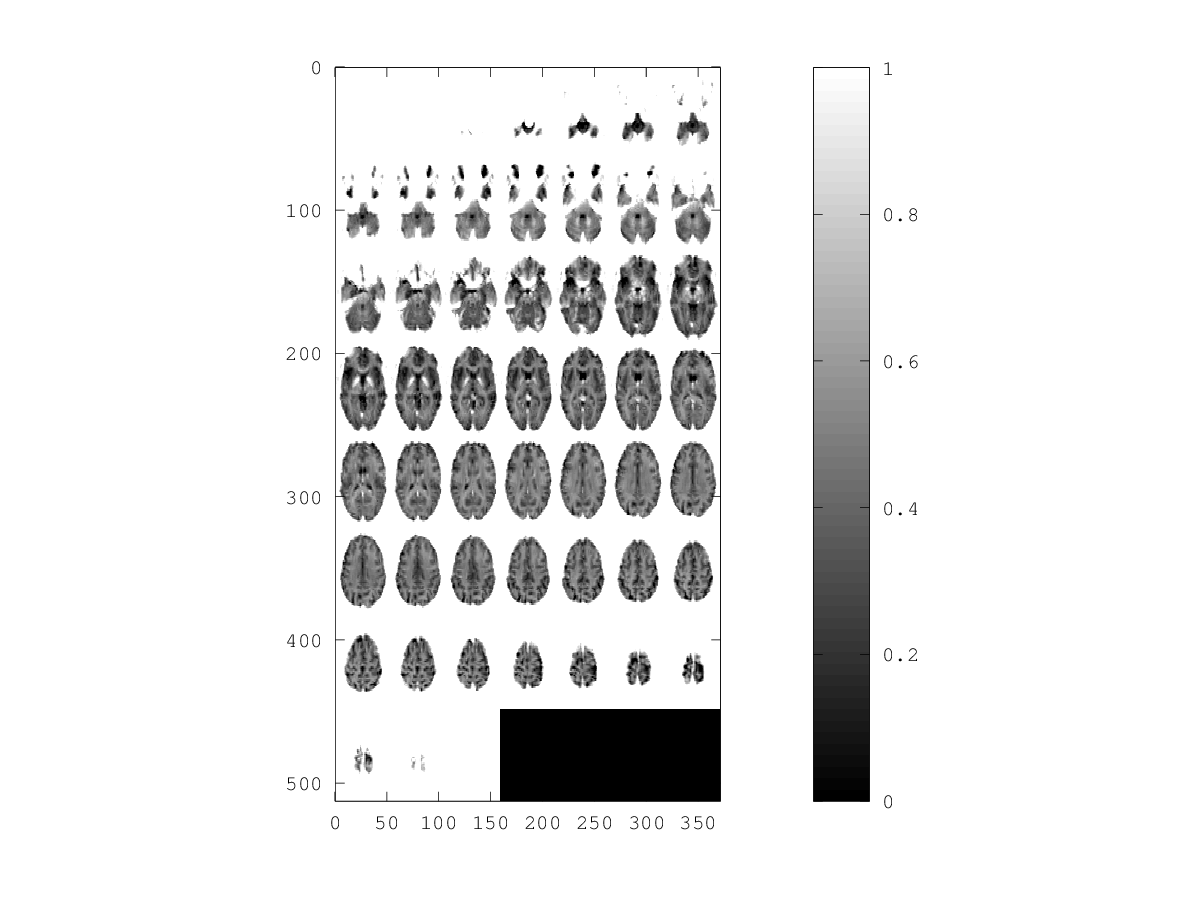

In [33]:
%% Invert contrast
[hdr,vol] = niak_read_vol(files_out.vol_nu);
mask = niak_mask_brain(vol);
param.perc_min = 0.01;
param.perc_max = 0.99;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
hdr.file_name =  [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.nii.gz'];
niak_write_vol(hdr,vol);

opt.type_color = 'gray';
niak_montage(vol,opt)

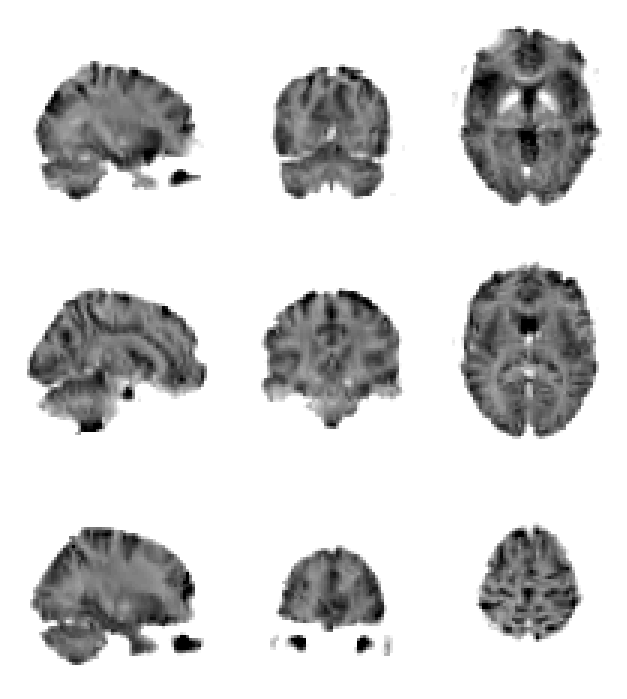

In [37]:
%% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = [0 1];
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

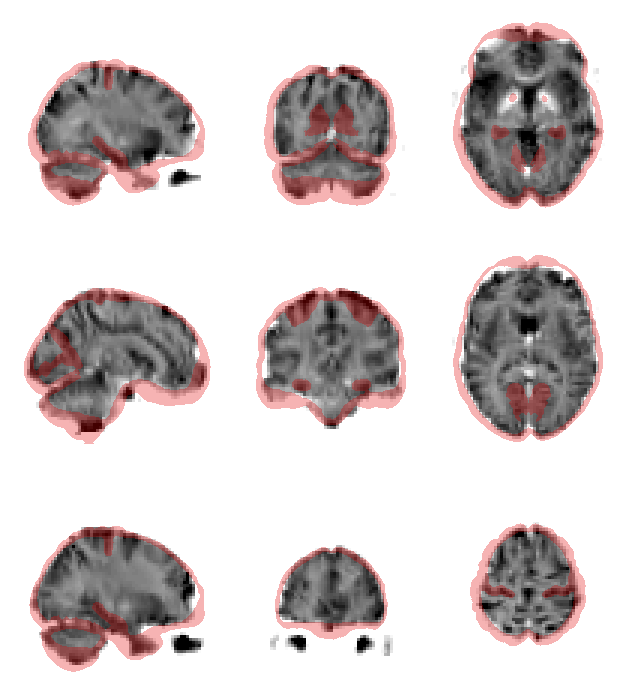

In [38]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv_outline.png'];
jopt.transparency = 0.7 ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

## Generate .gif

In [39]:
# generate gif
file_func = [path_root 'template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv_outline.png'];
file_anat = [path_root 'template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white_func_outline.png'];
file_out = [path_root 'template_layout/test_data/HC0040013/qc_image_t1_brain_mask.gif'];
command = ['convert '  file_func ' ' file_anat ' ' file_func ' -delay 1 -morph 4 ' ...
file_out]

command = convert /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv_outline.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_white_func_outline.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_head_nu_resamp_inv_outline.png -delay 1 -morph 4 /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/qc_image_t1_brain_mask.gif


In [40]:
system(command)

ans = 0


## XP result

Brain head in the func is very fade. still having blinking effect when swithcing between func and anat

**Pierre an I suggestion: **
- Extract function brain and invert contrast and make background white 
- Add the anatomical headmask in the same functional image means we will have a functional volume wile its brain boirder are its anatomial one

**conclusion: **

Next XP build the funcitonal image, without surrounding head tissues, build the anatomical image, generate a binary mask of pixels that are pure white pixels in the func image, replace by pixels for the anatomical imagethe functional image with anatomical head mask